In [73]:
import pandas as pd
import numpy as np
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [2]:
df = pd.read_csv('LoansTrainingSetV2.csv');

C:\Users\Divay Mohan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [4]:
print("Number Of DataPoints: ", df.shape[0])

Number Of DataPoints:  111107


In [5]:
print("Number of Features:" ,df.shape[1])

Number of Features: 19


In [6]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
Loan ID                         111107 non-null object
Customer ID                     111107 non-null object
Loan Status                     111107 non-null object
Current Loan Amount             111107 non-null int64
Term                            111107 non-null object
Credit Score                    89769 non-null float64
Years in current job            106414 non-null object
Home Ownership                  111107 non-null object
Annual Income                   89769 non-null float64
Purpose                         111107 non-null object
Monthly Debt                    111107 non-null object
Years of Credit History         111107 non-null float64
Months since last delinquent    52104 non-null float64
Number of Open Accounts         111107 non-null int64
Number of Credit Problems       111107 non-null int64
Current Credit Balance          111107 non-null int64
Maximum Open

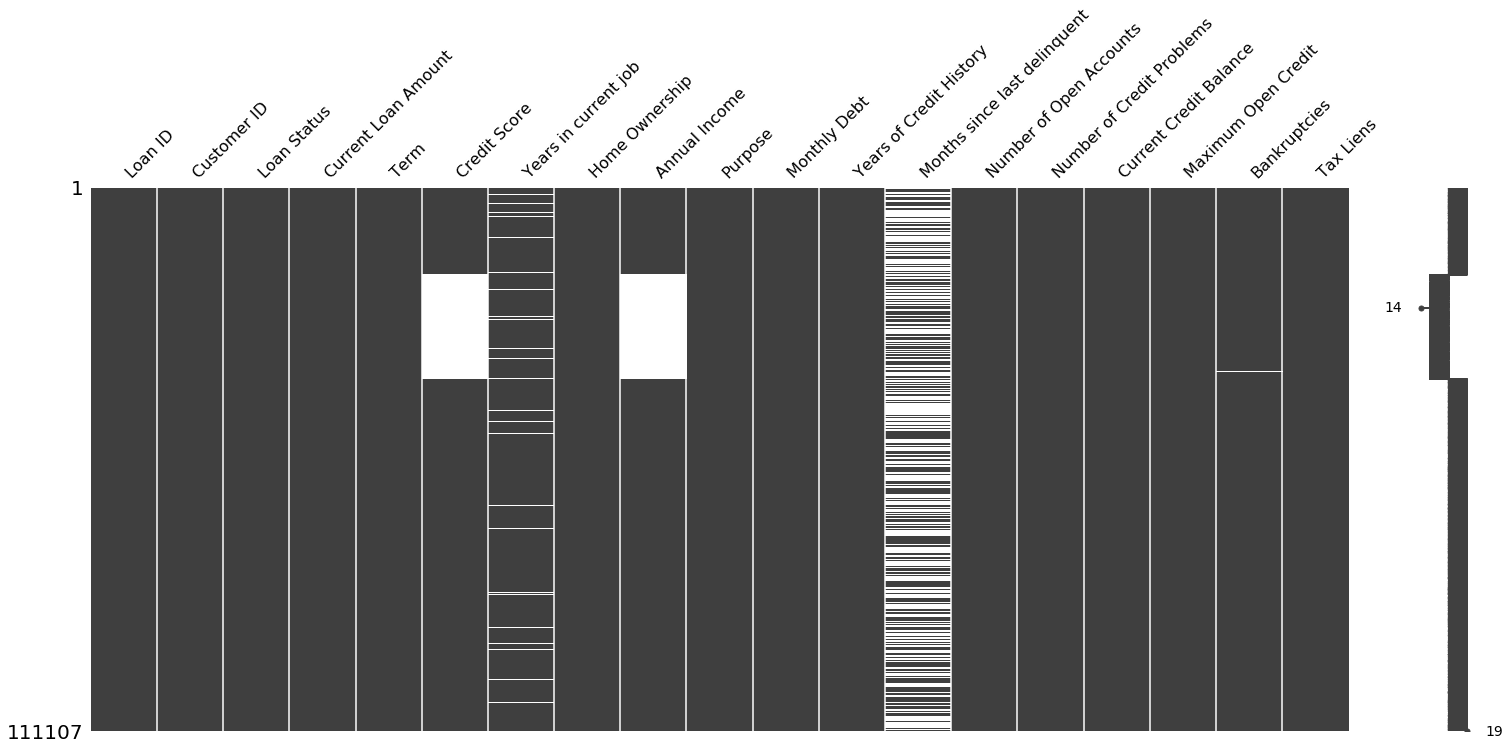

In [8]:
msn.matrix(df)

In [9]:
df['Loan Status'].unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [10]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [11]:
new_df = df.drop(['Customer ID','Loan ID'],axis=1)

In [12]:
new_df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [13]:
df.drop(['Months since last delinquent','Customer ID','Loan ID'],axis=1,inplace=True)

In [14]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,12,0,6762,7946,0.0,0.0
1,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,14,0,35706,77961,0.0,0.0
2,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,11,1,11275,14815,1.0,0.0
3,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,21,0,7009,43533,0.0,0.0
4,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,13,1,16913,19553,1.0,0.0


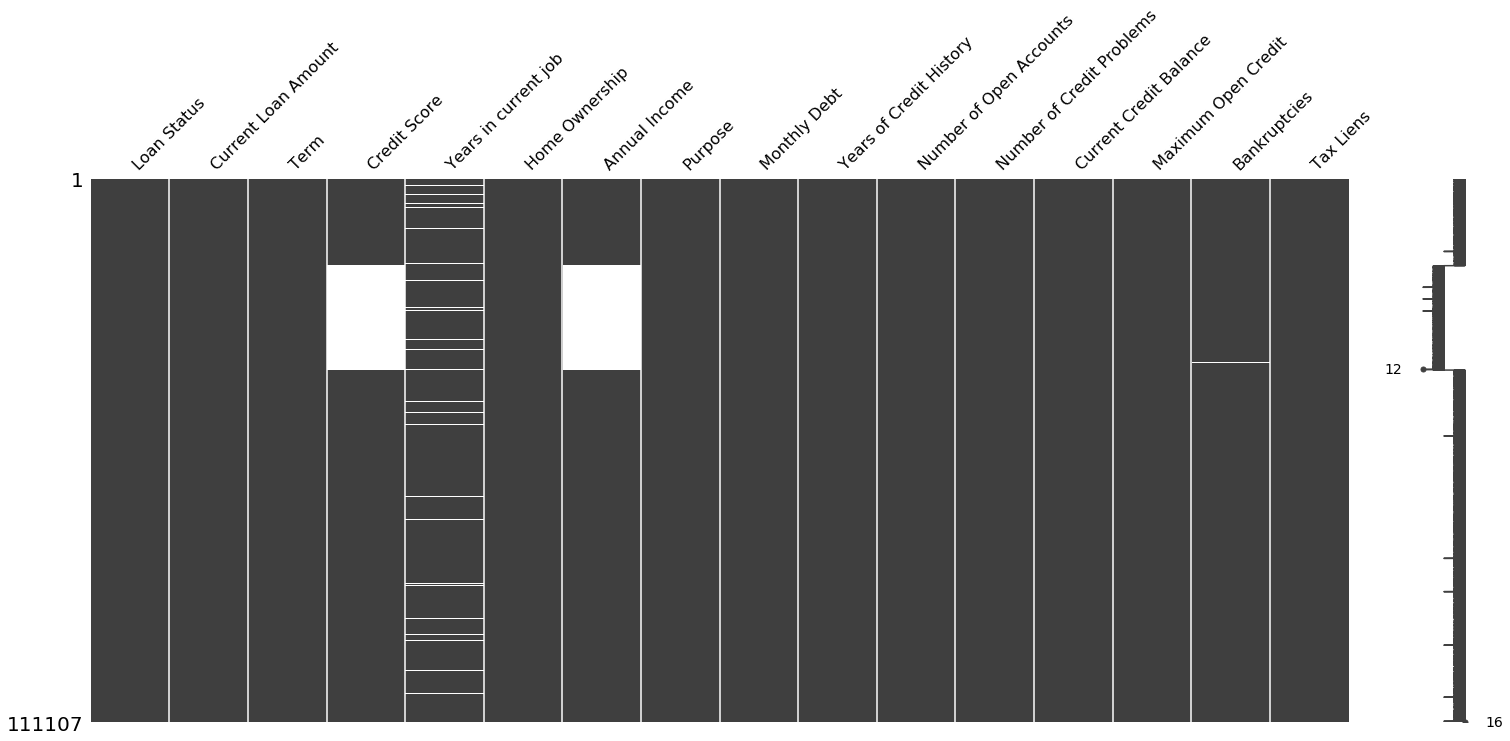

In [15]:
msn.matrix(df)

In [16]:
df = df.dropna()

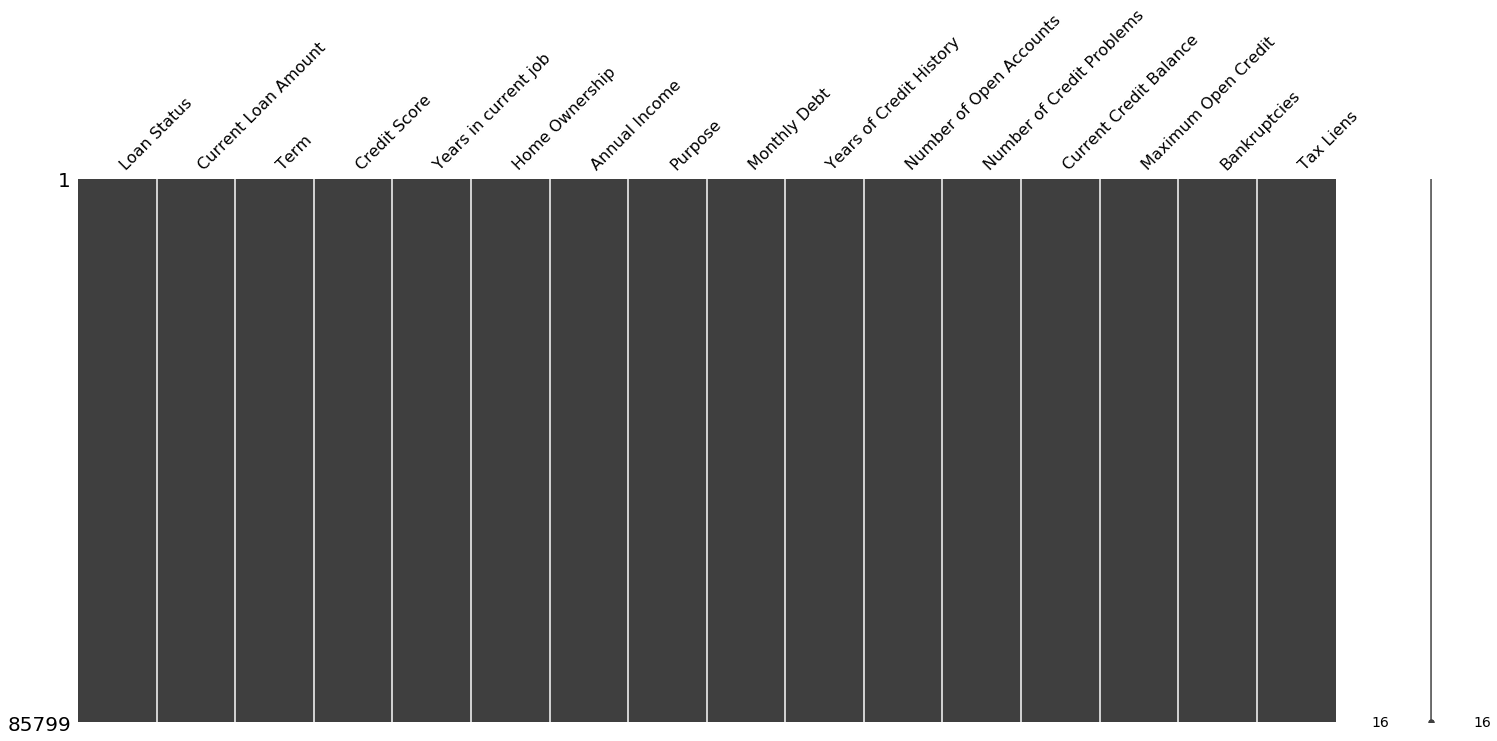

In [17]:
msn.matrix(df)

In [18]:
df.shape

(85799, 16)

In [19]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Years in current job', 'Home Ownership', 'Annual Income', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85799 entries, 0 to 111106
Data columns (total 16 columns):
Loan Status                  85799 non-null object
Current Loan Amount          85799 non-null int64
Term                         85799 non-null object
Credit Score                 85799 non-null float64
Years in current job         85799 non-null object
Home Ownership               85799 non-null object
Annual Income                85799 non-null float64
Purpose                      85799 non-null object
Monthly Debt                 85799 non-null object
Years of Credit History      85799 non-null float64
Number of Open Accounts      85799 non-null int64
Number of Credit Problems    85799 non-null int64
Current Credit Balance       85799 non-null int64
Maximum Open Credit          85799 non-null object
Bankruptcies                 85799 non-null float64
Tax Liens                    85799 non-null float64
dtypes: float64(5), int64(4), object(7)
memory usage: 11.1+ MB


In [21]:
df.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
111102,Fully Paid,15654,Long Term,686.0,10+ years,Rent,43050.0,Debt Consolidation,889.69,14.1,18,0,14730,29757,0.0,0.0
111103,Fully Paid,15237,Short Term,706.0,10+ years,Home Mortgage,60948.0,Debt Consolidation,700.9,15.9,11,0,17733,23060,0.0,0.0
111104,Fully Paid,10413,Short Term,719.0,5 years,Home Mortgage,66945.0,Debt Consolidation,1210.59,8.7,11,0,5205,6348,0.0,0.0
111105,Fully Paid,34447,Short Term,626.0,10+ years,Home Mortgage,78736.0,Debt Consolidation,1476.3,30.4,12,0,32318,37580,0.0,0.0
111106,Fully Paid,9209,Long Term,708.0,< 1 year,Own Home,123454.0,Debt Consolidation,668.71,20.1,8,0,6835,9261,0.0,0.0


In [22]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].astype('str')

In [23]:
df['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [24]:
df = df[df['Maximum Open Credit'].apply(lambda x: x.isnumeric())]

In [25]:
df['Maximum Open Credit']=df['Maximum Open Credit'].astype('float')


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85798 entries, 0 to 111106
Data columns (total 16 columns):
Loan Status                  85798 non-null object
Current Loan Amount          85798 non-null int64
Term                         85798 non-null object
Credit Score                 85798 non-null float64
Years in current job         85798 non-null object
Home Ownership               85798 non-null object
Annual Income                85798 non-null float64
Purpose                      85798 non-null object
Monthly Debt                 85798 non-null object
Years of Credit History      85798 non-null float64
Number of Open Accounts      85798 non-null int64
Number of Credit Problems    85798 non-null int64
Current Credit Balance       85798 non-null int64
Maximum Open Credit          85798 non-null float64
Bankruptcies                 85798 non-null float64
Tax Liens                    85798 non-null float64
dtypes: float64(6), int64(4), object(6)
memory usage: 11.1+ MB


In [27]:
df['Monthly Debt'].describe()

count     85798
unique    71754
top           0
freq         29
Name: Monthly Debt, dtype: object

In [28]:
df['Monthly Debt'] = df['Monthly Debt'].astype('str')

In [29]:
df['Monthly Debt']=df['Monthly Debt'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85798 entries, 0 to 111106
Data columns (total 16 columns):
Loan Status                  85798 non-null object
Current Loan Amount          85798 non-null int64
Term                         85798 non-null object
Credit Score                 85798 non-null float64
Years in current job         85798 non-null object
Home Ownership               85798 non-null object
Annual Income                85798 non-null float64
Purpose                      85798 non-null object
Monthly Debt                 85798 non-null float64
Years of Credit History      85798 non-null float64
Number of Open Accounts      85798 non-null int64
Number of Credit Problems    85798 non-null int64
Current Credit Balance       85798 non-null int64
Maximum Open Credit          85798 non-null float64
Bankruptcies                 85798 non-null float64
Tax Liens                    85798 non-null float64
dtypes: float64(7), int64(4), object(5)
memory usage: 11.1+ MB


In [31]:
df['Purpose'].describe()

count                  85798
unique                    16
top       Debt Consolidation
freq                   67407
Name: Purpose, dtype: object

In [32]:
df.select_dtypes(include=['object']).columns

Index(['Loan Status', 'Term', 'Years in current job', 'Home Ownership',
       'Purpose'],
      dtype='object')

In [33]:
print("Loan Status",df['Loan Status'].unique())
print("Term",df['Term'].unique())
print("Purpose",df['Purpose'].unique())
print("Owenership",df['Home Ownership'].unique())

Loan Status ['Charged Off' 'Fully Paid']
Term ['Short Term' 'Long Term']
Purpose ['Debt Consolidation' 'Home Improvements' 'other' 'Business Loan'
 'small_business' 'Other' 'moving' 'Buy a Car' 'Medical Bills' 'Buy House'
 'Take a Trip' 'vacation' 'major_purchase' 'Educational Expenses'
 'wedding' 'renewable_energy']
Owenership ['Rent' 'Home Mortgage' 'Own Home' 'HaveMortgage']


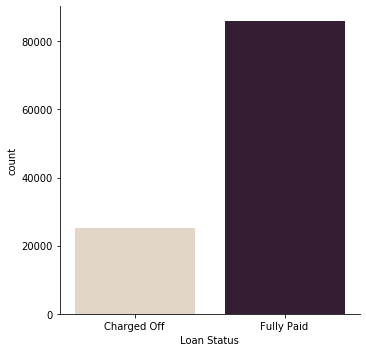

In [9]:
sns.catplot(x="Loan Status", kind="count", palette="ch:.25", data=df);

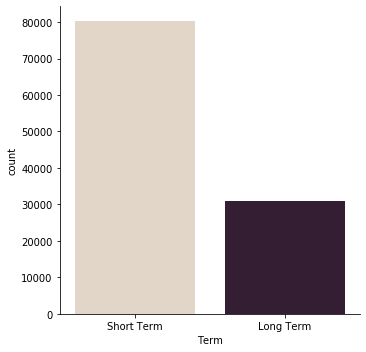

In [13]:
sns.catplot(x="Term", kind="count", palette="ch:.25", data=df);

In [34]:
n_df=pd.get_dummies(df,columns=['Loan Status', 'Term', 'Years in current job', 'Home Ownership',
       'Purpose'])

In [35]:
n_df.shape

(85798, 46)

In [36]:
n_df.dtypes

Current Loan Amount                 int64
Credit Score                      float64
Annual Income                     float64
Monthly Debt                      float64
Years of Credit History           float64
Number of Open Accounts             int64
Number of Credit Problems           int64
Current Credit Balance              int64
Maximum Open Credit               float64
Bankruptcies                      float64
Tax Liens                         float64
Loan Status_Charged Off             uint8
Loan Status_Fully Paid              uint8
Term_Long Term                      uint8
Term_Short Term                     uint8
Years in current job_1 year         uint8
Years in current job_10+ years      uint8
Years in current job_2 years        uint8
Years in current job_3 years        uint8
Years in current job_4 years        uint8
Years in current job_5 years        uint8
Years in current job_6 years        uint8
Years in current job_7 years        uint8
Years in current job_8 years      

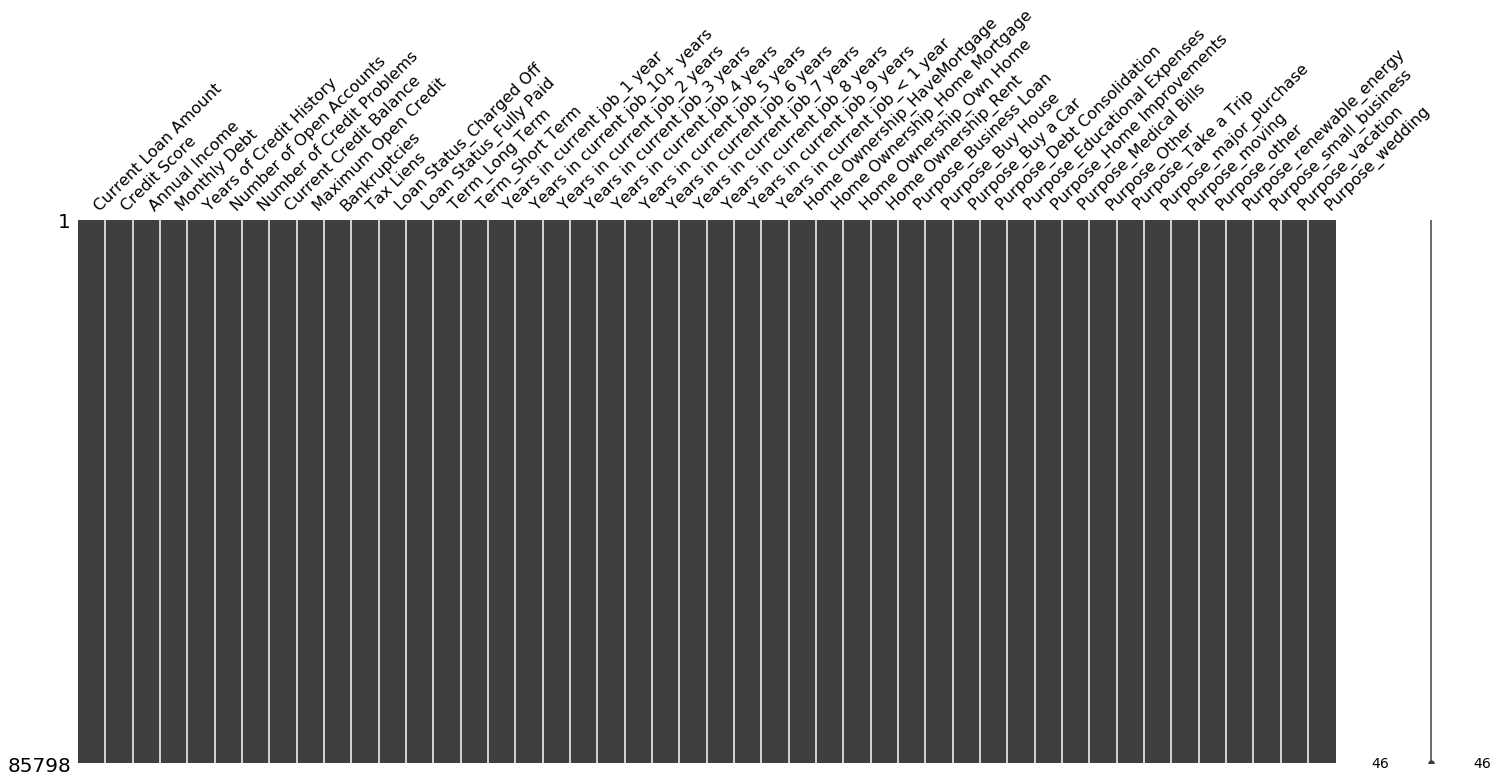

In [37]:
msn.matrix(n_df)

In [38]:
#n_df.shape
print("Cleaned Data Number OF Features: ",n_df.shape[1])
print("Cleaned Data Number OF DataPoints: ",n_df.shape[0])

Cleaned Data Number OF Features:  46
Cleaned Data Number OF DataPoints:  85798


# EDA of Data

In [39]:
n_df.shape

(85798, 46)

In [40]:
n_df.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Loan Status_Charged Off', 'Loan Status_Fully Paid', 'Term_Long Term',
       'Term_Short Term', 'Years in current job_1 year',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years', 'Years in current job_< 1 year',
       'Home Ownership_HaveMortgage', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent',
       'Purpose_Business Loan', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose

C:\Users\Divay Mohan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Divay Mohan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


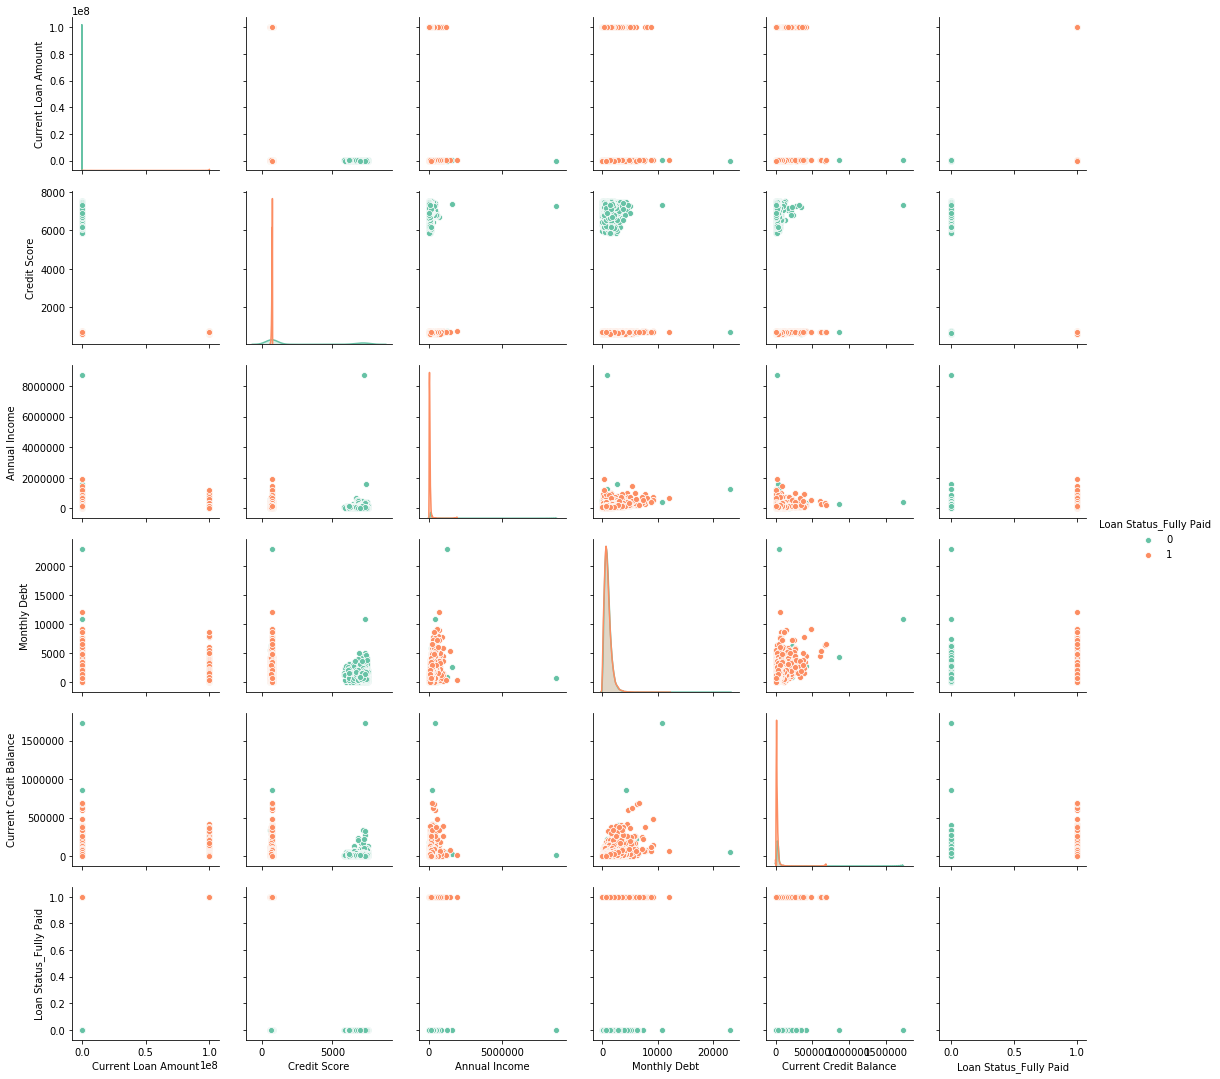

In [43]:
sns.pairplot(n_df[['Current Loan Amount','Credit Score', 'Annual Income', 'Monthly Debt','Current Credit Balance','Loan Status_Fully Paid']], hue="Loan Status_Fully Paid", palette="Set2", height=2.5)

## Check For Outliers

### Univarient EDA

In [60]:
n_df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
count,8.579800e+04,85798.000000,8.579800e+04,85798.000000,85798.000000,85798.000000,85798.000000,8.579800e+04,8.579800e+04,85798.000000,...,85798.000000,85798.000000,85798.000000,85798.000000,85798.000000,85798.000000,85798.000000,85798.00000,85798.000000,85798.000000
mean,1.426912e+07,1071.685797,7.357141e+04,986.511425,17.980553,11.194935,0.164153,1.563128e+04,3.340404e+04,0.114094,...,0.011224,0.032378,0.005699,0.003625,0.001492,0.060631,0.000105,0.00296,0.000851,0.001096
std,3.495827e+07,1466.114509,5.658784e+04,646.371728,6.786765,5.035560,0.482041,2.020036e+04,3.065689e+05,0.346923,...,0.105348,0.177004,0.075280,0.060097,0.038596,0.238653,0.010241,0.05433,0.029157,0.033082
min,7.010000e+02,585.000000,4.033000e+03,0.000000,3.700000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,8.737000e+03,705.000000,4.539700e+04,551.430000,13.400000,8.000000,0.000000,6.000000e+03,1.247700e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.485800e+04,724.000000,6.323300e+04,866.025000,16.800000,10.000000,0.000000,1.118250e+04,2.130700e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,2.512800e+04,741.000000,8.827200e+04,1277.887500,21.500000,14.000000,0.000000,1.952400e+04,3.561825e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,22939.120000,70.500000,76.000000,15.000000,1.730472e+06,6.998809e+07,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [45]:
n_df.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Loan Status_Charged Off', 'Loan Status_Fully Paid', 'Term_Long Term',
       'Term_Short Term', 'Years in current job_1 year',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years', 'Years in current job_< 1 year',
       'Home Ownership_HaveMortgage', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent',
       'Purpose_Business Loan', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose

### Current Loan Amount

In [59]:
n_df['Current Loan Amount'].head()

0    12232
1    25014
2    16117
3    11716
4     9789
Name: Current Loan Amount, dtype: int64

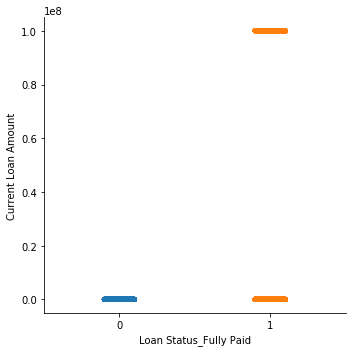

In [67]:
sns.catplot(x="Loan Status_Fully Paid", y="Current Loan Amount", data=n_df);

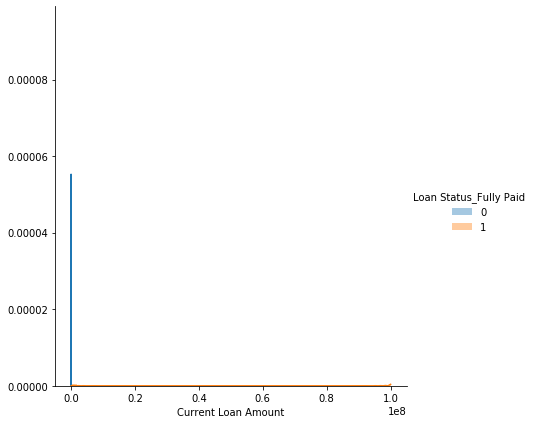

In [76]:
sns.FacetGrid(n_df, hue="Loan Status_Fully Paid", size=6) \
    .map(sns.distplot, "Current Loan Amount") \
    .add_legend();
plt.show()

In [64]:
o_df = n_df[n_df['Current Loan Amount'].apply(lambda x: x<99999999)]

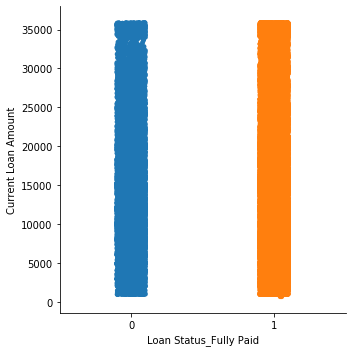

In [65]:
sns.catplot(x="Loan Status_Fully Paid", y="Current Loan Amount", data=o_df);

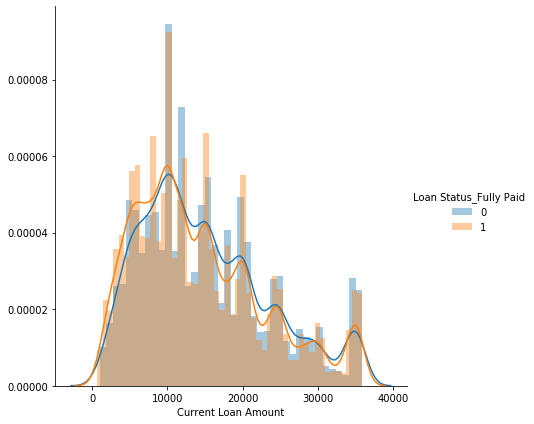

In [74]:
sns.FacetGrid(o_df, hue="Loan Status_Fully Paid", size=6) \
    .map(sns.distplot, "Current Loan Amount") \
    .add_legend();
plt.show()

In [77]:
print(o_df.shape)


(73566, 46)


### Credit Score

In [78]:
o_df['Credit Score'].describe()

count    73566.000000
mean      1129.207909
std       1575.940015
min        585.000000
25%        703.000000
50%        722.000000
75%        740.000000
max       7510.000000
Name: Credit Score, dtype: float64

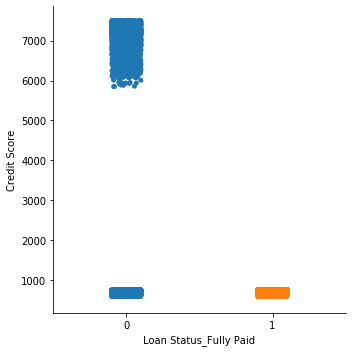

In [79]:
sns.catplot(x="Loan Status_Fully Paid", y="Credit Score", data=o_df);

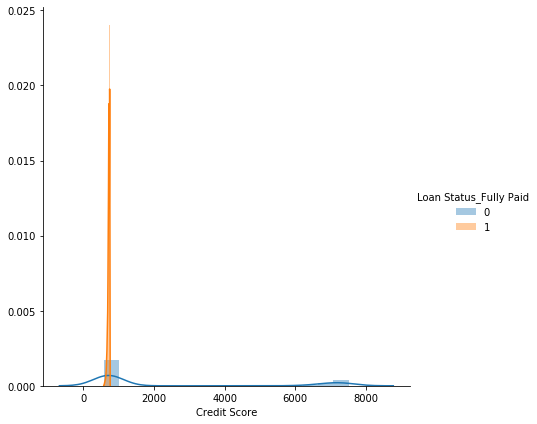

In [80]:
sns.FacetGrid(o_df, hue="Loan Status_Fully Paid", size=6) \
    .map(sns.distplot, "Credit Score") \
    .add_legend();
plt.show()

In [83]:
c_df = o_df[o_df['Credit Score'].apply(lambda x: x<5000)]

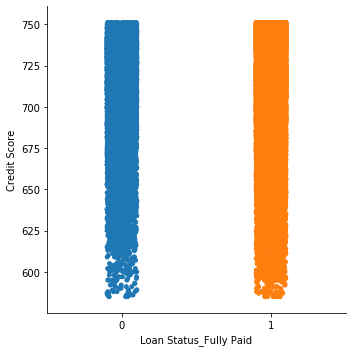

In [84]:
sns.catplot(x="Loan Status_Fully Paid", y="Credit Score", data=c_df);

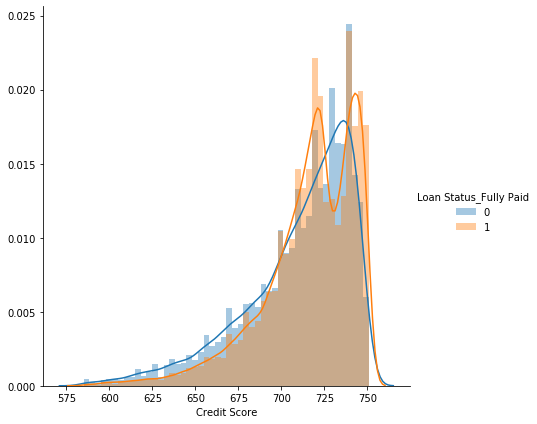

In [85]:
sns.FacetGrid(c_df, hue="Loan Status_Fully Paid", size=6) \
    .map(sns.distplot, "Credit Score") \
    .add_legend();
plt.show()

In [87]:
c_df.shape

(68799, 46)

### Annual Income

In [88]:
c_df['Annual Income'].describe()

count    6.879900e+04
mean     7.362600e+04
std      4.828014e+04
min      4.033000e+03
25%      4.546400e+04
50%      6.343000e+04
75%      8.843150e+04
max      1.919760e+06
Name: Annual Income, dtype: float64

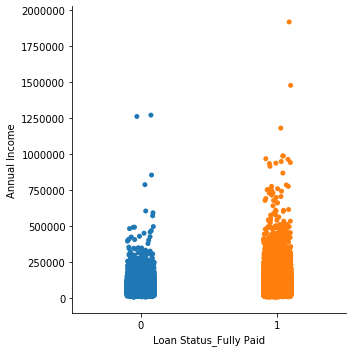

In [89]:
sns.catplot(x="Loan Status_Fully Paid", y="Annual Income", data=c_df);

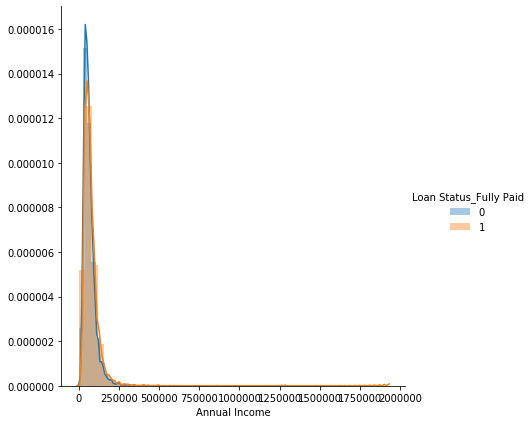

In [91]:
sns.FacetGrid(c_df, hue="Loan Status_Fully Paid", size=6) \
    .map(sns.distplot, 'Annual Income') \
    .add_legend();
plt.show()

In [94]:
a_df = c_df[c_df['Annual Income'].apply(lambda x: x<500000)]

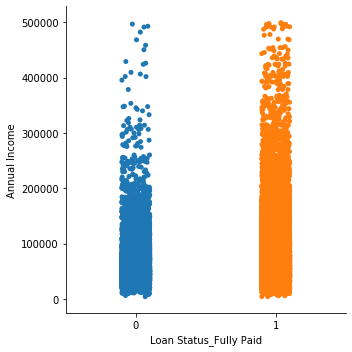

In [95]:
sns.catplot(x="Loan Status_Fully Paid", y="Annual Income", data=a_df);

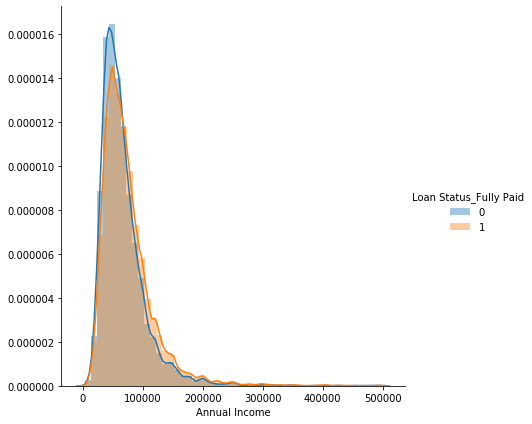

In [96]:
sns.FacetGrid(a_df, hue="Loan Status_Fully Paid", size=6) \
    .map(sns.distplot, 'Annual Income') \
    .add_legend();
plt.show()

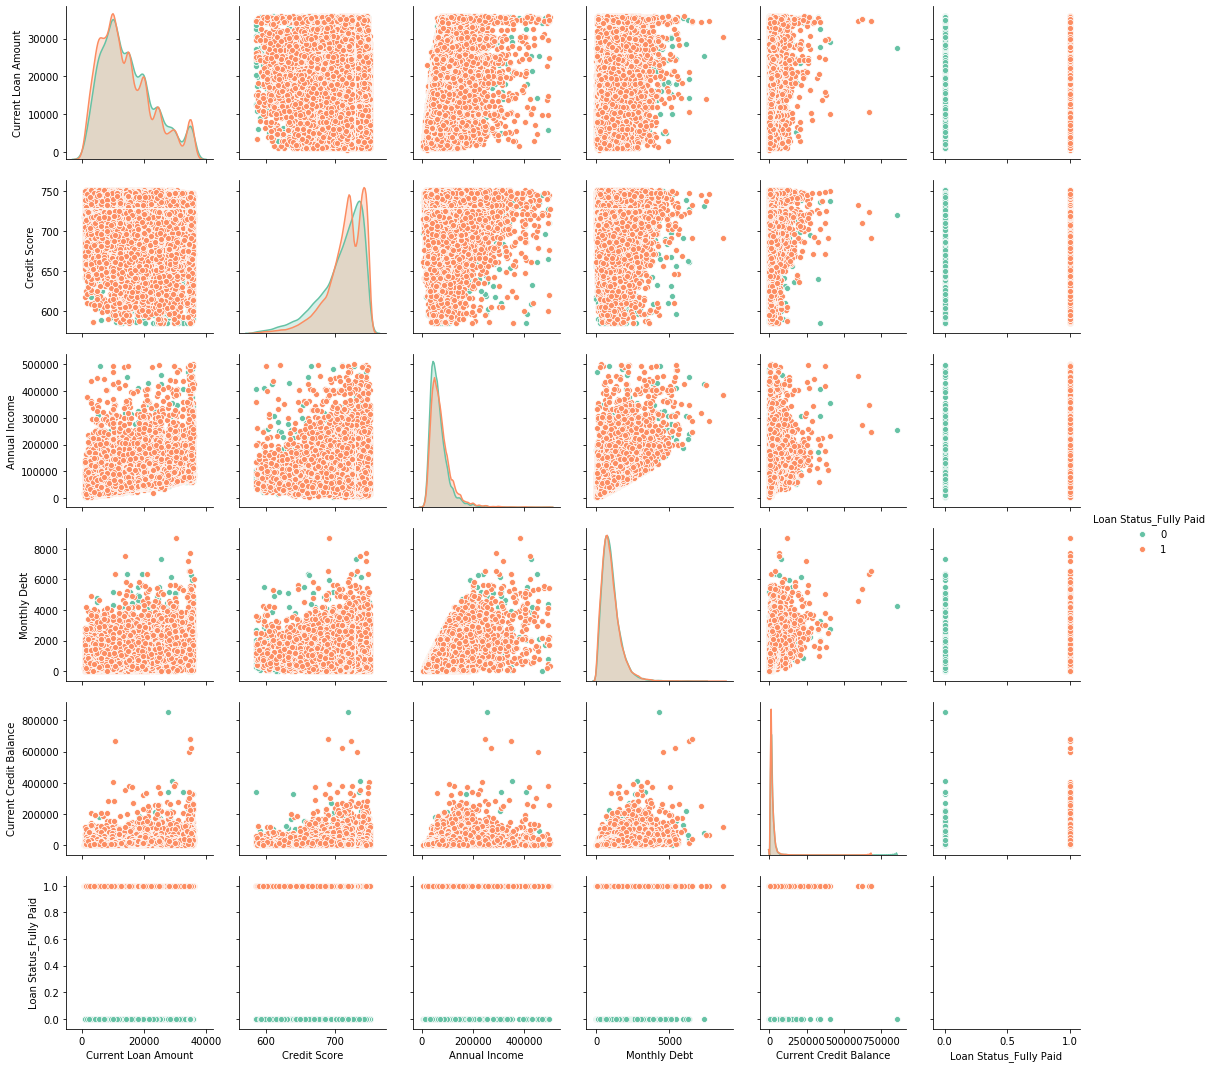

In [99]:
sns.pairplot(a_df[['Current Loan Amount','Credit Score', 'Annual Income', 'Monthly Debt','Current Credit Balance','Loan Status_Fully Paid']], hue="Loan Status_Fully Paid", palette="Set2", height=2.5)
plt.show()

### Monthly Debt

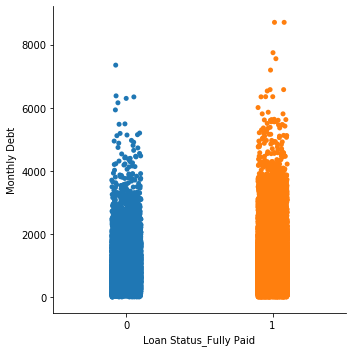

In [98]:
sns.catplot(x="Loan Status_Fully Paid", y="Monthly Debt", data=a_df);

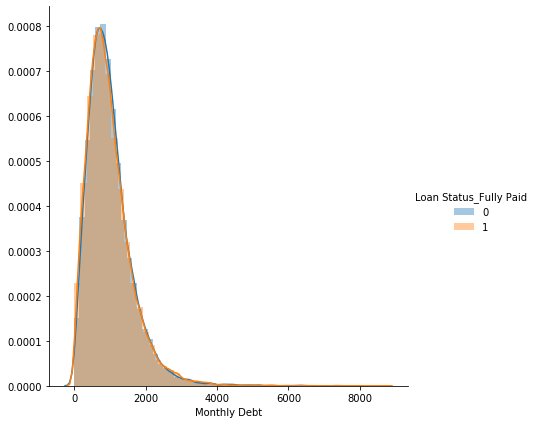

In [101]:
sns.FacetGrid(a_df, hue="Loan Status_Fully Paid", size=6) \
    .map(sns.distplot, 'Monthly Debt') \
    .add_legend();
plt.show()

In [100]:
print("before",a_df.shape)
m_df = a_df[a_df['Monthly Debt'].apply(lambda x: x<5000)]
print("after",m_df.shape)

before (68737, 46)
after (68675, 46)


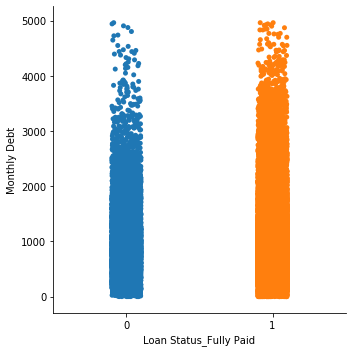

In [102]:
sns.catplot(x="Loan Status_Fully Paid", y="Monthly Debt", data=m_df);

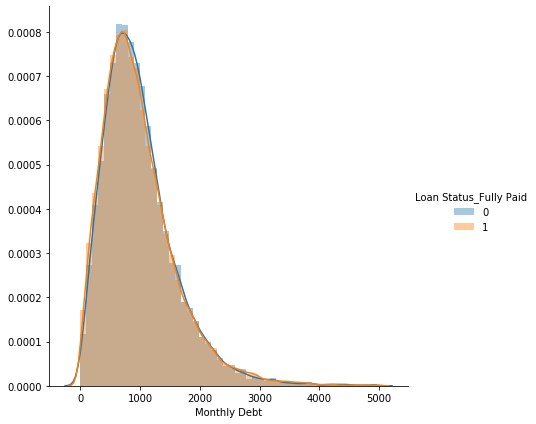

In [103]:
sns.FacetGrid(m_df, hue="Loan Status_Fully Paid", size=6) \
    .map(sns.distplot, 'Monthly Debt') \
    .add_legend();
plt.show()